In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Needed for Lingustic Analysis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split
from pprint import pprint
# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

import nltk 

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [10]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [11]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
# Inserting a column as the Target
data_fake["class"] = 0
data_true["class"] = 1

In [14]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [19]:
data = pd.concat([data_fake, data_true], axis = 0)
data.shape

(44898, 5)

In [21]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [49]:
df = data.drop(["title", "subject","date"], axis = 1)

In [26]:
# To check if there are any missing values in the dataset
df.isnull().sum()

text     0
class    0
dtype: int64

In [29]:
# To random shuffle the dataset
df = df.sample(frac = 1)

In [30]:
df.head()

,text,class
10584,WASHINGTON (Reuters) - Republicans’ refusal to...,1
11881,"MOMBASA, Kenya (Reuters) - Kenyan police raide...",1
13172,LA PAZ (Reuters) - More than half the ballots ...,1
4910,Donald Trump s presidential campaign has been ...,0
18519,WASHINGTON (Reuters) - A U.S. service member f...,1


In [34]:
# To reset the index of the numbers (start from 1 all over again)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [32]:
df.columns

Index(['text', 'class'], dtype='object')

In [33]:
df.head()

,text,class
0,WASHINGTON (Reuters) - Republicans’ refusal to...,1
1,"MOMBASA, Kenya (Reuters) - Kenyan police raide...",1
2,LA PAZ (Reuters) - More than half the ballots ...,1
3,Donald Trump s presidential campaign has been ...,0
4,WASHINGTON (Reuters) - A U.S. service member f...,1


0    23481
1    21417
Name: class, dtype: int64
0    0.522985
1    0.477015
Name: class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


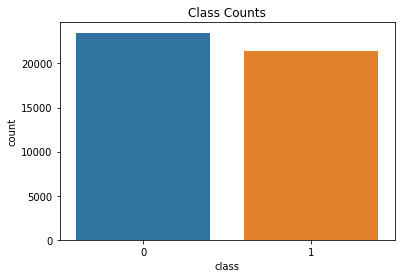

In [37]:
# Print the counts of each category
print(df['class'].value_counts())

# Print the proportions of each category
print(df['class'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(df['class'])
plt.title("Class Counts")
plt.show()

class
0    423.197905
1    385.640099
Name: word_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


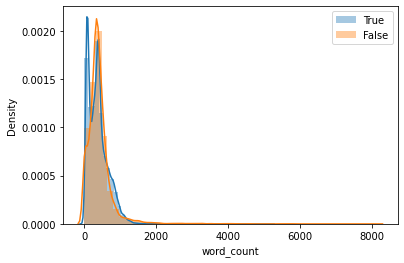

In [47]:
# Store the number of words in each messages
df['word_count'] = df['text'].str.split().str.len()

# Print the average number of words in each category
print(df.groupby('class')['word_count'].mean())

# Our dataset is balanced between all five categories

# Visualize the distribution of word counts in each category
sns.distplot(df[df['class']==1]['word_count'], label='True')
sns.distplot(df[df['class']==0]['word_count'], label='False')
plt.legend()
plt.show()

In [48]:
# Make the letters lower case and tokenize the words
tokenized_text = df['text'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_text)

0        [washington, (, reuters, ), -, republicans, ’,...
1        [mombasa, ,, kenya, (, reuters, ), -, kenyan, ...
2        [la, paz, (, reuters, ), -, more, than, half, ...
3        [donald, trump, s, presidential, campaign, has...
4        [washington, (, reuters, ), -, a, u.s., servic...
                               ...                        
44893                                                   []
44894    [istanbul, (, reuters, ), -, turkey, will, tak...
44895    [istanbul, (, reuters, ), -, turkey, said, on,...
44896    [brasilia, (, reuters, ), -, a, congressional,...
44897    [washington, (, reuters, ), -, tentative, plan...
Name: text, Length: 44898, dtype: object


In [44]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_text = tokenized_text.apply(alpha)

print(tokenized_text)

0        [donald, trump, just, couldn, t, wish, all, am...
1        [house, intelligence, committee, chairman, dev...
2        [on, friday, it, was, revealed, that, former, ...
3        [on, christmas, day, donald, trump, announced,...
4        [pope, francis, used, his, annual, christmas, ...
                               ...                        
21412    [brussels, reuters, nato, allies, on, tuesday,...
21413    [london, reuters, lexisnexis, a, provider, of,...
21414    [minsk, reuters, in, the, shadow, of, disused,...
21415    [moscow, reuters, vatican, secretary, of, stat...
21416    [jakarta, reuters, indonesia, will, buy, sukho...
Name: text, Length: 44898, dtype: object


In [45]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_text = tokenized_text.apply(remove_stop_words)

print(tokenized_text)

0        [donald, trump, wish, americans, happy, new, y...
1        [house, intelligence, committee, chairman, dev...
2        [friday, revealed, former, milwaukee, sheriff,...
3        [christmas, day, donald, trump, announced, wou...
4        [pope, francis, used, annual, christmas, day, ...
                               ...                        
21412    [brussels, reuters, nato, allies, tuesday, wel...
21413    [london, reuters, lexisnexis, provider, legal,...
21414    [minsk, reuters, shadow, disused, factories, m...
21415    [moscow, reuters, vatican, secretary, state, c...
21416    [jakarta, reuters, indonesia, buy, sukhoi, fig...
Name: text, Length: 44898, dtype: object


In [46]:
# Define a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_text = tokenized_text.apply(lemmatize)

print(tokenized_text)

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
21412    brussels reuters nato ally tuesday welcomed pr...
21413    london reuters lexisnexis provider legal regul...
21414    minsk reuters shadow disused factory minsk str...
21415    moscow reuters vatican secretary state cardina...
21416    jakarta reuters indonesia buy sukhoi fighter j...
Name: text, Length: 44898, dtype: object


In [50]:
# Replace the columns with tokenized messages
df['text'] = tokenized_text

# Display the first five rows
display(df.head(10))

,text,class,word_count
0,"[washington, (, reuters, ), -, republicans, ’,...",1,595
1,"[mombasa, ,, kenya, (, reuters, ), -, kenyan, ...",1,339
2,"[la, paz, (, reuters, ), -, more, than, half, ...",1,311
3,"[donald, trump, s, presidential, campaign, has...",0,302
4,"[washington, (, reuters, ), -, a, u.s., servic...",1,156
5,"[london, (, reuters, ), -, britain, s, brexit,...",1,95
6,"[bill, maher, and, barney, frank, totally, sch...",0,610
7,"[brussels, (, reuters, ), -, british, prime, m...",1,456
8,"[on, monday, ,, the, election, of, donald, tru...",0,610
9,"[president, obama, is, pissed, off, and, he, t...",0,597


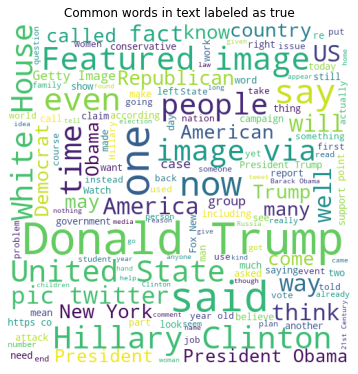

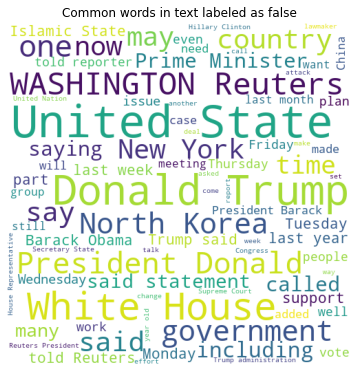

In [51]:
# Get the true text
true = data[data['class']==0]['text'].str.cat(sep=', ')

# Get the ham messages
false = data[data['class']==1]['text'].str.cat(sep=', ')

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of message
true_wc = wc.generate(true)

# plot the world cloud for true                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(true_wc) 
plt.axis("off") 
plt.title("Common words in text labeled as true")
plt.tight_layout(pad = 0) 
plt.show() 

false_wc = wc.generate(false)
# plot the world cloud for spam                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(false_wc) 
plt.axis("off")
plt.title("Common words in text labeled as false")
plt.tight_layout(pad = 0) 
plt.show() 

In [52]:
# Select the features and the target
X = data['text']
y = data['class']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [54]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [55]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(tfidf_test, y_test))

Accuracy: 0.9468819599109132


Confusion Matrix For Naive Bayes

[[4471  225]
 [ 252 4032]]


Classification Report For Bayes

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4696
           1       0.95      0.94      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


ROC AUC Score: 0.9466316765206935


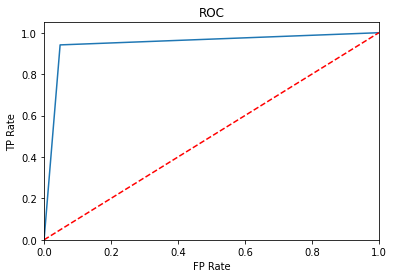

In [56]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix For Naive Bayes\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report For Bayes\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()